# 퍼셉트론 (Perceptron)

- 퍼셉트론은 논리 게이트를 모방할 수 있는 인공 신경망의 한 종류이다.
- 가중치와 편향을 통해 논리 게이트와 같은 동작을 한다.

In [2]:
import numpy as np

In [3]:
class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def activate(self, x):  # perceptron 연산
        return 1 if np.dot(self.weights, x) + self.bias > 0 else 0


In [4]:
test_cases = [(0, 0), (0, 1), (1, 0), (1, 1)]

In [5]:
AND_gate = Perceptron(weights=[0.5, 0.5], bias=-0.7)

for test in test_cases:
    print(f"input: {test} | output: {AND_gate.activate(test)}")

input: (0, 0) | output: 0
input: (0, 1) | output: 0
input: (1, 0) | output: 0
input: (1, 1) | output: 1


In [6]:
OR_gate = Perceptron(weights=[0.5, 0.5], bias=-0.2)

for test in test_cases:
    print(f"input: {test} | output: {OR_gate.activate(test)}")

input: (0, 0) | output: 0
input: (0, 1) | output: 1
input: (1, 0) | output: 1
input: (1, 1) | output: 1


In [7]:
NAND_gate = Perceptron(weights=[-0.5, -0.5], bias=0.7)

for test in test_cases:
    print(f"input: {test} | output: {NAND_gate.activate(test)}")

input: (0, 0) | output: 1
input: (0, 1) | output: 1
input: (1, 0) | output: 1
input: (1, 1) | output: 0


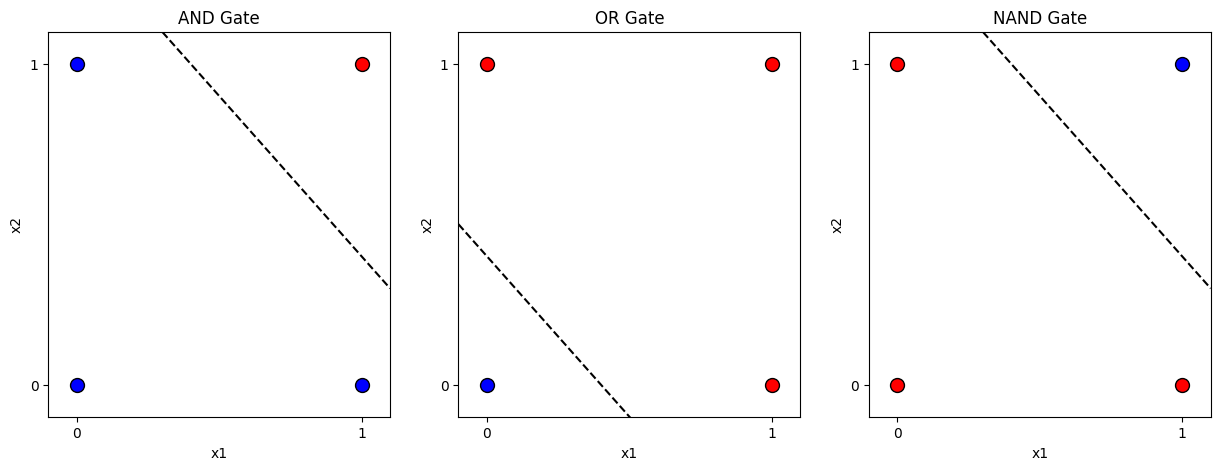

In [8]:
# 시각화
import matplotlib.pyplot as plt

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
gates = {
    "AND": AND_gate,
    "OR": OR_gate,
    "NAND": NAND_gate
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (gate_name, perceptron) in enumerate(gates.items()):
    ax = axes[idx]
    outputs = np.array([perceptron.activate(x) for x in inputs])

    # input 값을 결과에 따라 산점도로 표시
    for (x1, x2), y in zip(inputs, outputs):
        ax.scatter(x1, x2, c='red' if y == 1 else 'blue', s=100, edgecolor='black')
    
    # 결정 경계 표현
    x_vals = np.linspace(-0.1, 1.1, 100)
    y_vals = (-perceptron.weights[0] * x_vals - perceptron.bias) / perceptron.weights[1]
    ax.plot(x_vals, y_vals, 'k--')

    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_title(f'{gate_name} Gate')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

plt.show()

### XOR gate

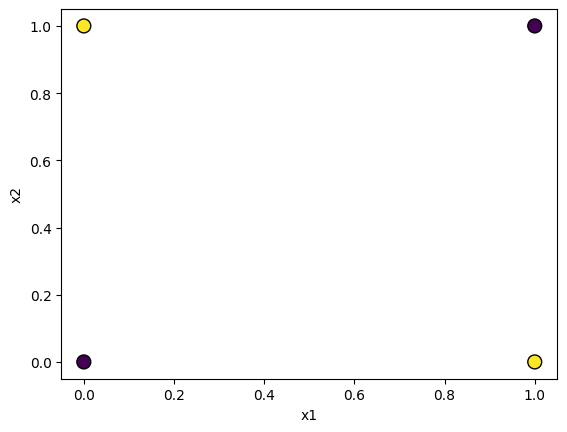

In [9]:
# XOR 데이터 생성
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# 시각화
plt.scatter(X[:,0],X[:,1],c=y,s=100,edgecolor='black')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


# 다중 퍼셉트론 (Multi-Layer Perceptron,MLP)

In [10]:
def XOR_gate(x1,x2):
    nand_output = NAND_gate.activate(np.array([x1,x2]))
    or_output = OR_gate.activate(np.array([x1,x2]))
    return AND_gate.activate(np.array([nand_output,or_output]))

# XOR 결과 확인
for x in X:
    print(f"input: {x} | output: {XOR_gate(x[0],x[1])}")
    

input: [0 0] | output: 0
input: [0 1] | output: 1
input: [1 0] | output: 1
input: [1 1] | output: 0


In [19]:
from sklearn.neural_network import MLPClassifier

X =np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

mlp = MLPClassifier(
    hidden_layer_sizes=(2,),    # 은닉층 크기
    activation='relu',          # 활성화 함수
    solver='adam',              # 가중치 업데이트 방식 (최적화 알고리즘)
    max_iter=1000,              # 모델의 학습 반복 횟수 (epochs)
    random_state=42             # 가중치 초기화 값 고정
    )
mlp.fit(X,y)

# 예측
pred = mlp.predict(X)

for i in range(4):
    print(f"XOR: {X[i][0]} {X[i][1]} | output: {pred[i]}")


XOR: 0 0 | output: 1
XOR: 0 1 | output: 1
XOR: 1 0 | output: 1
XOR: 1 1 | output: 1


In [24]:
X =np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

hidden_layers = [(1,),(2,),(4,),(8,)]

for config in hidden_layers:
    mlp = MLPClassifier(
        hidden_layer_sizes=config,    # 은닉층 크기
        activation='tanh',          # 활성화 함수
        solver='lbfgs',              # 가중치 업데이트 방식 (최적화 알고리즘)
        max_iter=1000,              # 모델의 학습 반복 횟수 (epochs)
        random_state=42             # 가중치 초기화 값 고정
        )
    mlp.fit(X,y)

    # 예측
    pred = mlp.predict(X)
    print(f"은닉층 구조 {config} | 예측 결과: {pred}")
    


은닉층 구조 (1,) | 예측 결과: [0 1 1 1]
은닉층 구조 (2,) | 예측 결과: [1 0 1 0]
은닉층 구조 (4,) | 예측 결과: [0 1 1 0]
은닉층 구조 (8,) | 예측 결과: [0 1 1 0]
